# 1. Setting Up

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
from nltk import ConditionalFreqDist
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# 2(a). Loading the Dataset

We will be analyzing the dataset of the inaugural speeches by US presidents. Let's explore the dataset.

In [218]:
raw_data = []
for fileid in inaugural.fileids():
    raw_data.append([fileid, " ".join(inaugural.words(fileid))])
data = pd.DataFrame(raw_data, columns=["File ID", "Text"])
data

,File ID,Text
0,1789-Washington.txt,Fellow - Citizens of the Senate and of the Hou...
1,1793-Washington.txt,"Fellow citizens , I am again called upon by th..."
2,1797-Adams.txt,"When it was first perceived , in early times ,..."
3,1801-Jefferson.txt,Friends and Fellow Citizens : Called upon to u...
4,1805-Jefferson.txt,"Proceeding , fellow citizens , to that qualifi..."
5,1809-Madison.txt,Unwilling to depart from examples of the most ...
6,1813-Madison.txt,About to add the solemnity of an oath to the o...
7,1817-Monroe.txt,I should be destitute of feeling if I was not ...
8,1821-Monroe.txt,"Fellow citizens , I shall not attempt to descr..."
9,1825-Adams.txt,In compliance with an usage coeval with the ex...


**Discussion**: Biden is the 46th president. Why are there 59 inaugural speeches?

# 2(b). Vectorize the Text

As we learnt in lecture, one way to vectorize text is using the [Term Frequency Inverse Document Frequency](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) (TF-IDF) featurizer. 

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(stop_words="english")

tfidf_matrix = vectorizer.fit_transform(data["Text"])
feature_names = vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(df)

         000       100       108        11       120       125        13  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.085582  0.000000  0.000000  0.000000  0.024987  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

Save the vocabulary in a variable `words`.

In [220]:
words = vectorizer.vocabulary_
print(words)

{'fellow': 3290, 'citizens': 1327, 'senate': 7177, 'house': 3970, 'representatives': 6734, 'vicissitudes': 8647, 'incident': 4168, 'life': 4799, 'event': 2975, 'filled': 3313, 'greater': 3701, 'anxieties': 482, 'notification': 5404, 'transmitted': 8194, 'order': 5563, 'received': 6472, '14th': 7, 'day': 2004, 'present': 6080, 'month': 5232, 'hand': 3772, 'summoned': 7791, 'country': 1870, 'voice': 8699, 'hear': 3852, 'veneration': 8626, 'love': 4893, 'retreat': 6858, 'chosen': 1307, 'fondest': 3396, 'predilection': 6044, 'flattering': 3356, 'hopes': 3954, 'immutable': 4063, 'decision': 2047, 'asylum': 687, 'declining': 2058, 'years': 8964, 'rendered': 6692, 'necessary': 5338, 'dear': 2016, 'addition': 204, 'habit': 3757, 'inclination': 4171, 'frequent': 3522, 'interruptions': 4454, 'health': 3848, 'gradual': 3673, 'waste': 8758, 'committed': 1469, 'time': 8093, 'magnitude': 4937, 'difficulty': 2333, 'trust': 8265, 'called': 1123, 'sufficient': 7769, 'awaken': 776, 'wisest': 8867, 'expe

Print the shape of your dataset. 

**Discussion**: What does each dimension stand for?

In [221]:
data.shape

(59, 2)

Print the stop words. 

**Discussion**: Do you think this is a reasonable list of stopwords?

In [222]:
stop_words = vectorizer.get_stop_words()
print(stop_words)

frozenset({'their', 'neither', 'out', 'within', 'with', 'someone', 'nobody', 'however', 'often', 'anyway', 'please', 'almost', 'several', 'inc', 'myself', 'well', 'had', 'becoming', 'one', 'side', 'hasnt', 'somewhere', 'wherever', 'after', 'interest', 'nothing', 'of', 'below', 'has', 'afterwards', 'three', 'than', 'cry', 'do', 'from', 'indeed', 'be', 'her', 'front', 'all', 'are', 'therefore', 'across', 'ltd', 'more', 'last', 'whereas', 'now', 'whom', 'down', 'latter', 'fill', 'meanwhile', 'were', 'i', 'onto', 'upon', 'anywhere', 'ours', 'whole', 'each', 'thereby', 'me', 'yourself', 'where', 'around', 'yourselves', 'every', 'our', 'next', 'thus', 'should', 'enough', 'herein', 'thin', 'during', 'would', 'twelve', 'together', 'first', 'still', 'very', 'thereafter', 'must', 'itself', 'much', 'yet', 'five', 'up', 'can', 'this', 'everywhere', 'in', 'amount', 'empty', 'am', 'ten', 'himself', 'here', 'most', 'become', 'per', 'he', 'mine', 'whereafter', 'because', 'when', 'might', 'show', 'an',

# 3. Running K-Means

We will now run k-means to cluster the dataset, using sklearn's [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Set `random_state=416`.

In [223]:
k = 5

from sklearn.cluster import KMeans

kmeans = KMeans(random_state=416, n_clusters=k)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5, random_state=416)

For visualization purposes, let's add the cluster labels to the pandas dataframe.

In [224]:
data["Clusters k=%d" % k] = kmeans.labels_
data

,File ID,Text,Clusters k=5
0,1789-Washington.txt,Fellow - Citizens of the Senate and of the Hou...,3
1,1793-Washington.txt,"Fellow citizens , I am again called upon by th...",1
2,1797-Adams.txt,"When it was first perceived , in early times ,...",3
3,1801-Jefferson.txt,Friends and Fellow Citizens : Called upon to u...,3
4,1805-Jefferson.txt,"Proceeding , fellow citizens , to that qualifi...",3
5,1809-Madison.txt,Unwilling to depart from examples of the most ...,3
6,1813-Madison.txt,About to add the solemnity of an oath to the o...,3
7,1817-Monroe.txt,I should be destitute of feeling if I was not ...,3
8,1821-Monroe.txt,"Fellow citizens , I shall not attempt to descr...",3
9,1825-Adams.txt,In compliance with an usage coeval with the ex...,3


**Discussion**: What trends do you observe? What underlying patterns might the clustering algorithm have picked up on?

To further analyze the clusters, let's print the most frequent words per cluster.

In [225]:
cluster_to_words_to_num_occurences = {}
for i in range(k):
    cluster_to_words_to_num_occurences[i] = {}
    for word in words:
        num_occurences = 0
        for _, text in data[(data["Clusters k=%d" % k] == i)]["Text"].items():
            if word.lower() in text.lower().split(" "):
                num_occurences += 1
        cluster_to_words_to_num_occurences[i][word] = num_occurences

num_words = 10
for i in range(k):
    top_words = [(cluster_to_words_to_num_occurences[i][word], word) for word in cluster_to_words_to_num_occurences[i]]
    top_words.sort(reverse=True)
    print("Cluster %d: " % i, top_words[:num_words])

Cluster 0:  [(5, 'years'), (5, 'world'), (5, 'use'), (5, 'united'), (5, 'true'), (5, 'states'), (5, 'state'), (5, 'shall'), (5, 'secure'), (5, 'questions')]
Cluster 1:  [(4, 'shall'), (4, 'proper'), (4, 'high'), (4, 'government'), (4, 'fellow'), (3, 'years'), (3, 'world'), (3, 'war'), (3, 'united'), (3, 'union')]
Cluster 2:  [(23, 'world'), (23, 'time'), (23, 'people'), (23, 'life'), (23, 'great'), (22, 'today'), (22, 'new'), (22, 'nation'), (22, 'hope'), (22, 'god')]
Cluster 3:  [(25, 'rights'), (25, 'citizens'), (24, 'states'), (24, 'public'), (24, 'people'), (24, 'fellow'), (24, 'country'), (23, 'time'), (23, 'shall'), (23, 'powers')]
Cluster 4:  [(2, 'world'), (2, 'work'), (2, 'wealth'), (2, 'weak'), (2, 'today'), (2, 'things'), (2, 'success'), (2, 'strength'), (2, 'spirit'), (2, 'social')]


**Discussion**: What words are common across all clusters? What words are more unique to particular clusters?

world

**Discussion**: Why do the clusters not correspond to meaningful topics of words?

# 4. Selecting K

Sklearn's KMeans classifier's `inertia_` property returns the objective function, or quality, of the clustering. 

**Discussion**: What would we expect the inertia to be when k=59?

In [226]:
ks = []
inertias = []
for k in range(1, 60, 2):
    
    pass

Graph it out

IndexError: list index out of range

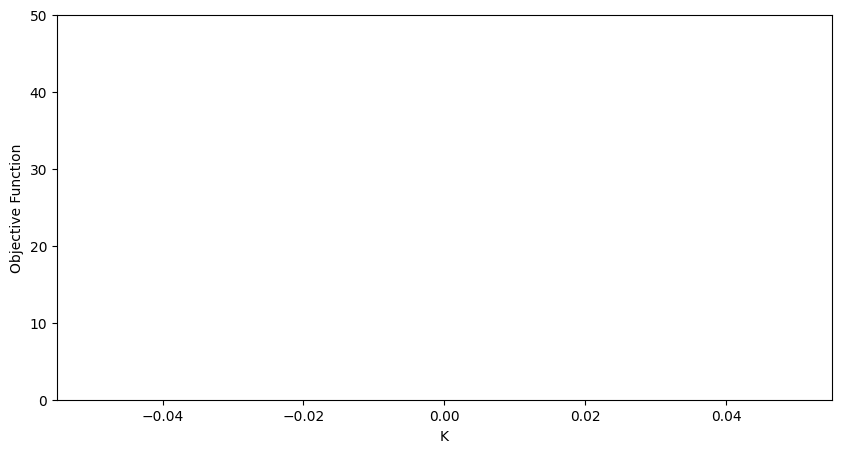

In [227]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ks, inertias, marker='o')
ax.set_ylim(0, 50)
ax.set_xlabel("K")
ax.set_ylabel("Objective Function")
ax.set_xticks(range(0, ks[-1], 2), minor=True)
ax.grid(which='both')

**Discussion**: What appears to be the best value of k?

# 5. (Bonus) Exploring the Data!

The below function takes in a list of words and graphs their occurance in presidents' speeches over the years. Use it to identify trends in the data!

In [ ]:
def words_over_time(words):
    cfd = ConditionalFreqDist(
        (target, int(fileid[:4]))
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in words
        if w.lower().startswith(target))
    cfd.plot()

In [ ]:
plt.figure(figsize=(12, 5))
words_over_time(["war", "peace"])